In [1]:
import hashlib
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import calendar
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
def job_clean(df_job):
    df_job['open_date']=pd.to_datetime(df_job['open_date'])
    print(df_job.company_name.nunique())
    df_job=df_job.drop_duplicates()
    print(df_job.company_name.nunique())
    df_job_open=df_job.groupby('job_id').open_date.count().reset_index()
    ### some job_id has multiple seniority_id
#     df_job=df_job.sort_values(['job_id','seniority_id'])
#     print(df_job.columns)
#     df_job=df_job.groupby(['job_id']).head(1)
    print(df_job.company_name.nunique())
    df_job['open_month']=df_job['open_date'].apply(lambda x: calendar.month_abbr[x.month])
    df_job['open_date']=df_job['open_date'].apply(lambda x: x.date)
    print(df_job.shape)
    return df_job

def count_df(df_job,df_candi,df_app):
    print("----df_app-------")
    print(df_app.create_date.min())
    print(df_app.create_date.max())
    print(df_app.shape)
    print("----df_job-------")
    print(df_job.open_date.min())
    print(df_job.open_date.max())
    print(df_job.shape)
    print("----df_candi-------")
    print(df_candi.create_date.min())
    print(df_candi.create_date.max())
    print(df_candi.shape)
    
    df_job_c=df_job.groupby('open_month').job_id.nunique().reset_index()
    df_job_c.columns=['Month','Opening Jobs']
    df_candi['create_date']=pd.to_datetime(df_candi['create_date'])
    df_candi['create_month']=df_candi['create_date'].apply(lambda x: calendar.month_abbr[x.month])
    df_candi_c=df_candi.groupby('create_month').profile_id.nunique().reset_index()
    df_candi_c.columns=['Month','Active Updating Candidates']
    
    
    df_app['create_date']=pd.to_datetime(df_app['create_date'])
    df_app['create_month']=df_app['create_date'].apply(lambda x: calendar.month_abbr[x.month])
    df_app_c=df_app.groupby('create_month').agg({'app_id':'nunique',
                                                 'profile_index':'nunique'}).reset_index()
    df_app_c.columns=['Month','Applications','Applicants']

    df_count=pd.concat([df_job_c.set_index('Month'),
                        df_candi_c.set_index('Month'),
                        df_app_c.set_index('Month')],axis=1).reset_index()
    month_dic={'Apr':4, 'Aug':8, 'Dec':12, 'Feb':2, 'Jan':1, 'Jul':7, 'Jun':6, 'Mar':3, 'May':5,
       'Nov':11, 'Oct':10, 'Sep':9}
    df_count['M']=df_count.Month.apply(lambda x: month_dic.get(x))
    df_count=df_count.sort_values('M')
    return df_count

In [3]:
df_app_2021=pd.concat([pd.read_csv('DB/app/application_2021_1.csv').iloc[:,1:],
                        pd.read_csv('DB/app/application_2021_2.csv').iloc[:,1:]])
print(df_app_2021.shape)
df_app_2021=df_app_2021.drop_duplicates()
print(df_app_2021.shape)

(3471379, 9)
(3471379, 9)


In [4]:
df_app_2022=pd.concat([pd.read_csv('DB/app/application_2022_1.csv').iloc[:,1:],
                       pd.read_csv('DB/app/application_2022_2.csv').iloc[:,1:],
                       pd.read_csv('DB/app/application_2022_3.csv').iloc[:,1:],
                       pd.read_csv('DB/app/application_2022_4.csv').iloc[:,1:],
                                          ])
print(df_app_2021.shape)
df_app_2022=df_app_2022.drop_duplicates()
print(df_app_2021.shape)

(3471379, 9)
(3471379, 9)


In [5]:
print(df_app_2021.create_date.min())
print(df_app_2021.create_date.max())

2021-07-01 00:00:00+00:00
2021-12-31 00:00:00+00:00


In [6]:
print(df_app_2022.create_date.min())
print(df_app_2022.create_date.max())

2022-01-01 00:00:00+00:00
2022-12-31 23:59:13.620000+00:00


In [7]:
df_job=pd.read_csv(r'C:\Users\nypsb\Desktop\x0pa1\WSG data csv files\v1\job_df_all.csv').iloc[:,1:]

df_job=job_clean(df_job)
df_job['open_date']=pd.to_datetime(df_job['open_date'])
df_job_2021_all=df_job[(df_job.open_date<'2022-01-01') & 
                           (df_job.open_date>='2021-01-01')]
df_job_2022_all=df_job[(df_job.open_date>='2022-01-01') & 
                (df_job.open_date<'2023-01-01')]


80417
80417
80417
(1995156, 9)


In [9]:
df_candi_2021=pd.read_csv('DB/app/candi_latest_update_in_2021.csv').iloc[:,1:]
df_candi_2022=pd.read_csv('DB/app/candi_latest_update_in_2022.csv').iloc[:,1:]

In [10]:
df_app_2021=df_app_2021.merge(df_job[['job_index','company_name']],on='job_index',how='left')
df_app_2022=df_app_2022.merge(df_job[['job_index','company_name']],on='job_index',how='left')

In [8]:
df_count2021=count_df(df_job_2021_all,df_candi_2021,df_app_2021)
df_count2022=count_df(df_job_2022_all,df_candi_2022,df_app_2022)

NameError: name 'df_candi_2021' is not defined

In [11]:
"""
df_count2021.to_csv('DB/app/2021.csv')
df_count2022.to_csv('DB/app/2022.csv')
"""

In [92]:
df_uen_ssic=pd.read_csv('DB/company_uen_all.csv').iloc[:,1:]
df_uen_ssic.shape

(80417, 2)

In [120]:
df_acra2022=pd.read_csv(r'DB/acra2022clean.csv').iloc[:,1:].rename(columns={'entity_name':'company_name'})
df_acra2022.shape

(1830850, 24)

In [94]:
df_acra2022.columns

Index(['uen', 'company_name', 'entity_type_description',
       'business_constitution_description', 'company_type_description',
       'paf_constitution_description', 'entity_status_description',
       'registration_incorporation_date', 'uen_issue_date', 'address_type',
       'building_name', 'postal_code', 'other_address_line1',
       'other_address_line2', 'account_due_date', 'annual_return_date',
       'no_of_charges', 'primary_ssic_code', 'primary_ssic_description',
       'primary_user_described_activity', 'to_pad_ssic', '5_ssic',
       'primary_ssic_code_2digit', 'SSIC 2020 Title'],
      dtype='object')

In [95]:
print(df_acra2022.company_name.nunique())
print(df_acra2022.uen.nunique())
df_acra2022[['uen','company_name']].drop_duplicates().shape

1809610
1818624


(1830850, 2)

In [96]:
df_acra2022=df_acra2022.dropna(subset=['company_name'])

In [98]:
df_uen_ssic=df_uen_ssic.merge(df_acra2022,on=['uen','company_name'],how='left')

In [122]:
df_acra2022.uen

0           53011372D
1           53019870C
2          T06LL0525D
3          202029653R
4           52944295K
              ...    
1830845    199802542K
1830846     53213038C
1830847     52920088X
1830848    201006718D
1830849     53157497X
Name: uen, Length: 1830850, dtype: object

In [124]:
df_acra2022[df_acra2022.company_name=='GOVERNMENT TECHNOLOGY AGENCY']

,uen,company_name,entity_type_description,business_constitution_description,company_type_description,paf_constitution_description,entity_status_description,registration_incorporation_date,uen_issue_date,address_type,...,account_due_date,annual_return_date,no_of_charges,primary_ssic_code,primary_ssic_description,primary_user_described_activity,to_pad_ssic,5_ssic,primary_ssic_code_2digit,SSIC 2020 Title


In [9]:
df_uen_ssic=pd.read_csv(r'C:\Users\nypsb\Desktop\x0pa1\WSG data csv files\v1\company_uen_acra2022.csv')

In [172]:
df_industry_posting_job_2022=df_job_2022_all.merge(df_uen_ssic[['company_name','uen','5_ssic',
       'primary_ssic_code_2digit','SSIC 2020 Title']],
                                   on='company_name',how='left')

In [10]:
df_industry_posting_job_2021=df_job_2021_all.merge(df_uen_ssic[['company_name','uen','5_ssic',
       'primary_ssic_code_2digit','SSIC 2020 Title']],
                                   on='company_name',how='left')

In [11]:
df_industry_posting_job_2021.columns

Index(['job_id', 'job_index', 'company_name', 'job_name', 'min_salary',
       'max_salary', 'open_date', 'job_status', 'open_month', 'uen', '5_ssic',
       'primary_ssic_code_2digit', 'SSIC 2020 Title'],
      dtype='object')

In [12]:
df_industry_posting_job_2021.shape

(666968, 13)

In [13]:
df_industry_posting_job_2021.head()

,job_id,job_index,company_name,job_name,min_salary,max_salary,open_date,job_status,open_month,uen,5_ssic,primary_ssic_code_2digit,SSIC 2020 Title
0,2335077,856aab7c43283829f2b0bcbe7b4d9457,IBM SINGAPORE PTE LTD,IT Support Specialist (2 year contract),6500.0,8400.0,2021-05-26,Closed,May,197501566C,46511.0,46.0,WHOLESALE TRADE
1,2335078,0c72e522723afc8e5cf303b70fb82b9f,TALENT TRADER GROUP PTE. LTD.,"Safety Coordinator, MNC/Basic + Allowance",3000.0,4500.0,2021-05-26,Closed,May,201230353E,78104.0,78.0,EMPLOYMENT ACTIVITIES
2,2335079,a5e973978a228f4dfda2abed7a3b9606,AIMS IMMIGRATION SPECIALIST PTE. LTD.,Client Support Specialist,2600.0,3500.0,2021-05-26,Closed,May,200822130H,70201.0,70.0,ACTIVITIES OF HEAD OFFICES; MANAGEMENT CONSULT...
3,2335080,ab26395f2c4c3a274658689e6073b56b,RAPID PRESS PTE. LTD.,Handmaker,1400.0,1800.0,2021-05-26,Closed,May,201829988R,17022.0,17.0,MANUFACTURE OF PAPER AND PAPER PRODUCTS
4,2335082,61fae9b46b452a3bd0b50218a80c6cff,L'OREAL SINGAPORE PTE. LTD.,Consumer Insights Manager,8000.0,14000.0,2021-05-26,Closed,May,199001413D,46424.0,46.0,WHOLESALE TRADE


In [ ]:
df_industry_posting_job_2021.to_csv(r'C:\Users\nypsb\Desktop\x0pa1\WSG data csv files\v1\jobs2021withSSIC.csv')

HERE NOW

In [191]:
df_industry_posting_app_2022=df_app_2022.merge(df_uen_ssic[['company_name','uen','5_ssic',
       'primary_ssic_code_2digit','SSIC 2020 Title']],
                                   on='company_name',how='left')

In [193]:
df_industry_posting_app_2021=df_app_2021.merge(df_uen_ssic[['company_name','uen','5_ssic',
       'primary_ssic_code_2digit','SSIC 2020 Title']],
                                   on='company_name',how='left')

In [170]:
def barplot_company(df_industry_posting_job):

    ax=sns.countplot(y="SSIC 2020 Title", data=df_industry_posting_job,
                  order=df_industry_posting_job['SSIC 2020 Title'].value_counts().iloc[:20].index)
    plt.xlabel('No. of Opening Positions')
    plt.show()

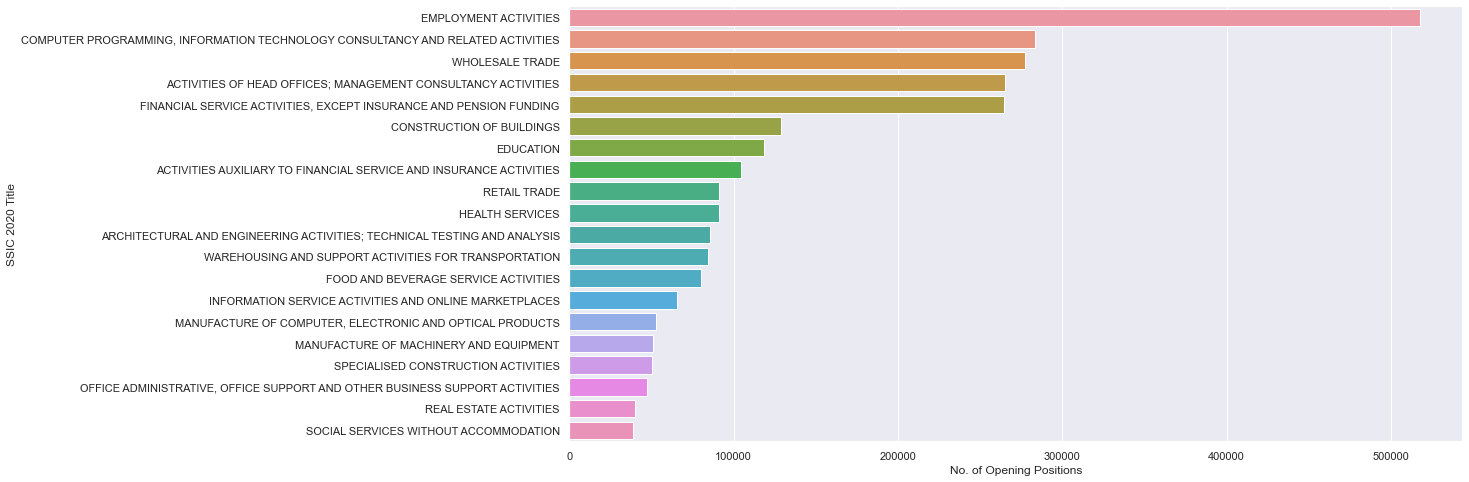

In [194]:
barplot_company(df_industry_posting_app_2021)

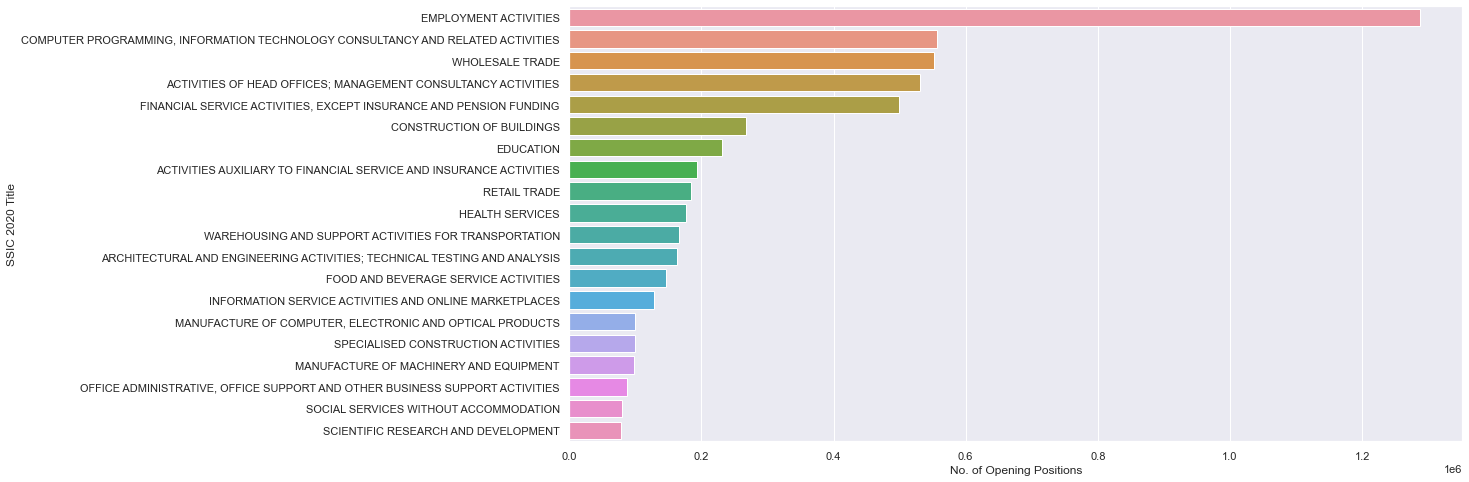

In [192]:
barplot_company(df_industry_posting_app_2022)

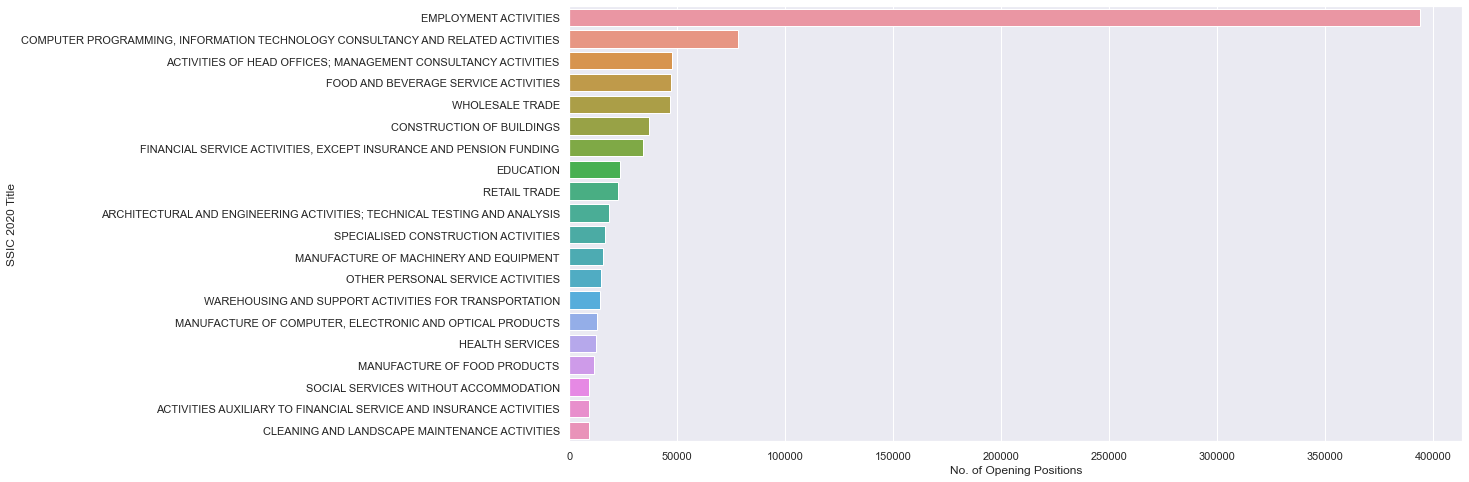

In [174]:
barplot_company(df_industry_posting_job_2022)

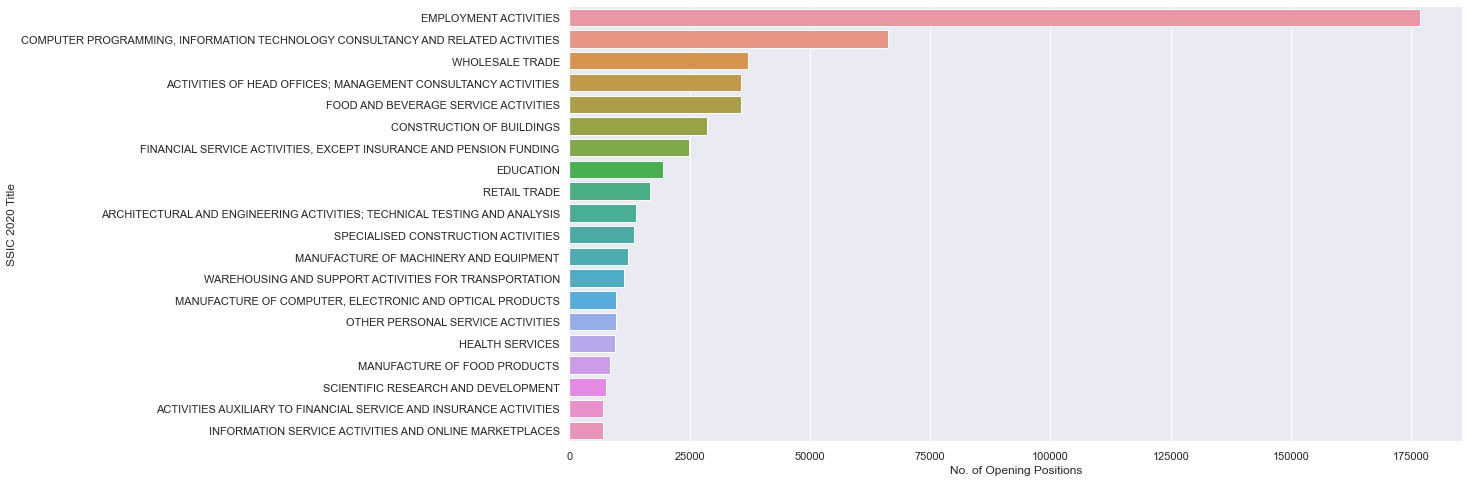

In [171]:
barplot_company(df_industry_posting_job_2021)

<AxesSubplot:xlabel='disposition_status_name', ylabel='overall_score'>

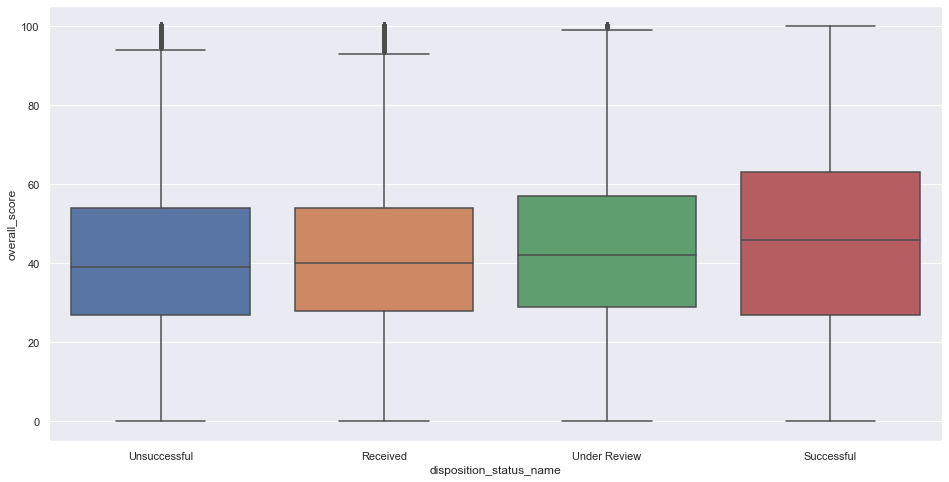

In [180]:
sns.boxplot(data=df_app_2022,x='disposition_status_name',y='overall_score')

### results compare

In [175]:
# applicants
print(df_app_2021.profile_index.nunique())
print(df_app_2022.profile_index.nunique())
print(df_app_2022.profile_index.nunique()/df_app_2021.profile_index.nunique()/2-1)

186241
285453
-0.23364618961453176


In [13]:
# applications
print(df_app_2021.app_id.nunique())
print(df_app_2022.app_id.nunique())
print(df_app_2022.app_id.nunique()/df_app_2021.app_id.nunique()/2-1)

3471379
7027928
0.012267459127914382


In [14]:
#openin job comparison
print(df_job_2021_all.job_index.nunique())
print(df_job_2022_all.job_index.nunique())
print(df_job_2022_all.job_index.nunique()/df_job_2021_all.job_index.nunique()-1)


666968
1056694
0.5843248851519114


In [15]:
# opening job companies comparison
print(df_job_2021_all.company_name.nunique())
print(df_job_2022_all.company_name.nunique())
print(df_job_2022_all.company_name.nunique()/df_job_2021_all.company_name.nunique()-1)


53360
61409
0.15084332833583214


In [16]:
# filled jobs comparisons
print(df_app_2021[df_app_2021.disposition_status_name=='Successful'].job_index.nunique())
print(df_app_2022[df_app_2022.disposition_status_name=='Successful'].job_index.nunique())
print(df_app_2022[df_app_2022.disposition_status_name=='Successful'].job_index.nunique()/
      df_app_2021[df_app_2021.disposition_status_name=='Successful'].job_index.nunique()/2)

4417
8138
0.9212134933212588


In [17]:
#screened jobs

print(df_app_2021[df_app_2021.disposition_status_name!='Received'].job_index.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].job_index.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].job_index.nunique()/
      df_app_2021[df_app_2021.disposition_status_name!='Received'].job_index.nunique()/2)


334494
647783
0.9683028694087188


In [18]:
#screened companies 
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].company_name.nunique())
print(df_app_2021[df_app_2021.disposition_status_name!='Received'].company_name.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].company_name.nunique()/
     df_app_2021[df_app_2021.disposition_status_name!='Received'].company_name.nunique()/2-1)

51196
38818
-0.3405636560358597


In [19]:
#percentage screened companies

print(df_app_2021[df_app_2021.disposition_status_name!='Received'].company_name.nunique()/
                                                         df_app_2021.company_name.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].company_name.nunique()/
                                                     df_app_2022.company_name.nunique())

0.9902551020408163
0.9202120967017166


In [20]:
#screened applications

print(df_app_2021[df_app_2021.disposition_status_name!='Received'].app_id.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].app_id.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].app_id.nunique()/
      df_app_2021[df_app_2021.disposition_status_name!='Received'].app_id.nunique()/2)

3189592
4962972
0.7779948030970733


In [21]:
#percentage screened applications

print(df_app_2021[df_app_2021.disposition_status_name!='Received'].app_id.nunique()/
                                                         df_app_2021.app_id.nunique())
print(df_app_2022[df_app_2022.disposition_status_name!='Received'].app_id.nunique()/
                                                     df_app_2022.app_id.nunique())


0.918825630966829
0.7061785493533799


In [22]:
df_app_2022.disposition_status_name.value_counts()

Unsuccessful    3359202
Received        2064956
Under Review    1594088
Successful         9682
Name: disposition_status_name, dtype: int64

In [23]:
df_app_2021.disposition_status_name.value_counts()

Unsuccessful    3130192
Received         281787
Under Review      54255
Successful         5145
Name: disposition_status_name, dtype: int64

In [181]:
df_active_company_2021_set=set(df_app_2021[df_app_2021.disposition_status_name!='Received'].company_name)
df_active_company_2022_set=set(df_app_2022[df_app_2022.disposition_status_name!='Received'].company_name)

offset_company_lst=df_active_company_2021_set-df_active_company_2022_set
len(offset_company_lst)

9354

In [25]:
onging_company_basedon_applicationtable=set(df_app_2021.company_name)&set(df_app_2021.company_name)
len(onging_company_basedon_applicationtable)

39200

In [26]:
onging_company_basedon_jobtable=set(df_job_2021_all.company_name)&set(df_job_2022_all.company_name)
print(len(onging_company_basedon_jobtable))

38621


In [27]:
len(onging_company_basedon_jobtable&onging_company_basedon_applicationtable)

30420

In [28]:
df_active_company_2021=df_app_2021[df_app_2021.disposition_status_name!='Received'].groupby('company_name').agg({
    'app_id':'nunique',
    'job_index':'nunique',
    }).reset_index()
df_active_company_2021.columns=['company_name','screening_appid_count','screening_jobindex_count']
df_active_company_2021['turn_inactive']=df_active_company_2021['company_name'].apply(lambda x: 1 if x in offset_company_lst else 0 )


df_active_company_2022=df_app_2022[df_app_2022.disposition_status_name!='Received'].groupby('company_name').agg({
    'app_id':'nunique',
    'job_index':'nunique',
    }).reset_index()
df_active_company_2022.columns=['company_name','screening_appid_count','screening_jobindex_count']
df_active_company_2022['turn_inactive']=df_active_company_2022['company_name'].apply(lambda x: 1 if x in offset_company_lst else 0 )

on_going_active_screening_companies=df_active_company_2021_set&df_active_company_2022_set
print(len(on_going_active_screening_companies))
df_active_company_2021['on_going_tag']=df_active_company_2021['company_name'].apply(lambda x: 1 if x in on_going_active_screening_companies else 0)
df_active_company_2022['on_going_tag']=df_active_company_2022['company_name'].apply(lambda x: 1 if x in on_going_active_screening_companies else 0)

29464


In [29]:
df_active_company_2022.head()

,company_name,screening_appid_count,screening_jobindex_count,turn_inactive,on_going_tag
0,"""K"" LINE LOGISTICS (SINGAPORE) PTE. LTD.",27,6,0,1
1,"""K"" LINE PTE LTD",680,39,0,1
2,"""K"" LINE SHIP MANAGEMENT (SINGAPORE) PTE. LTD.",186,12,0,1
3,#1 SG CAR DEALS PRIVATE LIMITED,7,4,0,0
4,#6 FRANKEL PTE. LTD.,13,7,0,1


In [30]:
df_testing_company=df_active_company_2021[(df_active_company_2021.screening_jobindex_count<=2)&(df_active_company_2021.turn_inactive==1)]
print(f"total {df_active_company_2021.turn_inactive.sum()} turn inactive companies from 2021-July to 2022; and total {df_testing_company.company_name.nunique()} companies only posted one job in 2021")

total 9354 turn inactive companies from 2021-July to 2022; and total 7886 companies only posted one job in 2021


In [31]:
df_active_company_2022[df_active_company_2022.on_going_tag==1].describe()

,screening_appid_count,screening_jobindex_count,turn_inactive,on_going_tag
count,29464.000000,29464.000000,29464.0,29464.0
mean,150.311668,19.782616,0.0,1.0
std,923.083361,337.328236,0.0,0.0
min,1.000000,1.000000,0.0,1.0
25%,8.000000,2.000000,0.0,1.0
50%,29.000000,5.000000,0.0,1.0
75%,101.000000,11.000000,0.0,1.0
max,114355.000000,53844.000000,0.0,1.0


In [32]:
df_active_company_2021[df_active_company_2021.turn_inactive==1].describe()

,screening_appid_count,screening_jobindex_count,turn_inactive,on_going_tag
count,9354.000000,9354.000000,9354.0,9354.0
mean,17.114496,1.892239,1.0,0.0
std,43.590879,3.723201,0.0,0.0
min,1.000000,1.000000,1.0,0.0
25%,2.000000,1.000000,1.0,0.0
50%,5.000000,1.000000,1.0,0.0
75%,15.000000,2.000000,1.0,0.0
max,1365.000000,196.000000,1.0,0.0
